### DATA CLEANING

In this project I did a data cleaning process for the diamonds_hw dataset. Data cleaning is an important process before conducting an analysis to ensure the data will produces a representative analysis. The steps I did include:

1. Detecting and handling missing values
2. Perform encoding for categorical data fields `clarity` column
3. Applying bloxplot to detect outliers in `x`,`y`,`z` columns

### Import Libraries

First, import all libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

import the `diamonds_hw.csv` dataset with pandas 

In [2]:
df = pd.read_csv('diamonds_hw.csv')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


The columns of the 'diamonds.csv' dataset have the following definitions:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Detecting and Handling Missing Value

In [21]:
df2 = df.copy()
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


The step above is to copy the dataset so that it doesn't change the original dataset

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [23]:
df2.isna().sum()

carat      125
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
dtype: int64

125 missing values were detected in the carat column

In [24]:
(df2['carat'].isna().sum() / df2.size)*100

0.02317389692250649

the missing value is only 0.023% of the total data, so that it can be removed row on the missing value

In [18]:
# remove row yang memiliki missing value
df2 = df.dropna()

# menguji apakah masih terdapat missing value
df2.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53815 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53815 non-null  object 
 2   color    53815 non-null  object 
 3   clarity  53815 non-null  object 
 4   depth    53815 non-null  float64
 5   table    53815 non-null  float64
 6   price    53815 non-null  int64  
 7   x        53815 non-null  float64
 8   y        53815 non-null  float64
 9   z        53815 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Re-check the column info to ensure the missing values are handled, by the information above i can say there are no missing values after deleted the rows

#### Perform Encoding For Categorical Data

In this step, i will perform encoding for `clarity` column to change the categorical data into numeric type

In [31]:
df2['clarity']

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: object

change the data type clarity from object to category :

In [39]:
df2['clarity'] = df2['clarity'].astype('category')


In [41]:
df2.dtypes

carat       float64
cut          object
color        object
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

encode the `clarity` value and adding the ClarityCat column to the dataset

In [43]:
df2['ClarityCat'] = df2['clarity'].cat.codes
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ClarityCat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3


In [44]:
df2.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,ClarityCat
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,3


The `ClarityCat` column is the numeric encoding of each clarity values

#### Detect Outlier by Using Bloxplot:

For this step, i perform the outlier detection for x,y,z columns

Outlier detection of `x` column

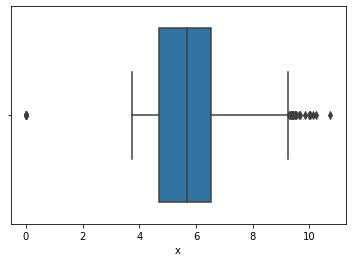

In [45]:
sns.boxplot(x=df2['x'])
plt.show()

In [53]:
def check_outlier(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                else 'not out-lier' for x in data[column].values]

In [54]:
df2['outlier_x'] = check_outlier(data=df2, column='x')

In [55]:
df2[df2['outlier_x'] == 'outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,ClarityCat,outlier_x
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00,3,outlier
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,5,outlier
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,4,outlier
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31,0,outlier
22831,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33,0,outlier
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38,0,outlier
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85,0,outlier
24297,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92,0,outlier
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03,0,outlier
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00,5,outlier


In [56]:
count_x_outlier = df2[df2['outlier_x'] == 'outlier'].count()
print(count_x_outlier)

carat         32
cut           32
color         32
clarity       32
depth         32
table         32
price         32
x             32
y             32
z             32
ClarityCat    32
outlier_x     32
dtype: int64


there are 32 outliers in column x

Outlier detection of `y` column

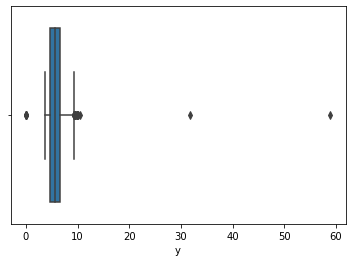

In [51]:
sns.boxplot(x=df2['y'])
plt.show()

In [52]:
def check_outlier(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                else 'not out-lier' for x in data[column].values]

In [57]:
df2['outlier_y'] = check_outlier(data=df2, column='y')

In [58]:
df2[df2['outlier_y'] == 'outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,ClarityCat,outlier_x,outlier_y
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,5,outlier,outlier
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,4,outlier,outlier
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31,0,outlier,outlier
22831,3.00,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33,0,outlier,outlier
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38,0,outlier,outlier
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,3,not out-lier,outlier
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85,0,outlier,outlier
24297,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92,0,outlier,outlier
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03,0,outlier,outlier
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00,5,outlier,outlier


In [59]:
count_y_outlier = df2[df2['outlier_y'] == 'outlier'].count()
print(count_y_outlier)

carat         29
cut           29
color         29
clarity       29
depth         29
table         29
price         29
x             29
y             29
z             29
ClarityCat    29
outlier_x     29
outlier_y     29
dtype: int64


there are 29 outliers in `y` column

**Outlier detection of `z` column**

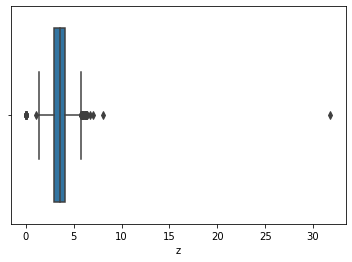

In [60]:
sns.boxplot(x=df2['z'])
plt.show()

In [61]:
def check_outlier(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                else 'not out-lier' for x in data[column].values]

In [62]:
df2['outlier_z'] = check_outlier(data=df2, column='z')

In [63]:
df2[df2['outlier_z'] == 'outlier']

,carat,cut,color,clarity,depth,table,price,x,y,z,ClarityCat,outlier_x,outlier_y,outlier_z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00,3,not out-lier,not out-lier,outlier
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00,0,not out-lier,not out-lier,outlier
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00,3,not out-lier,not out-lier,outlier
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00,3,not out-lier,not out-lier,outlier
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00,0,not out-lier,not out-lier,outlier
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00,3,outlier,not out-lier,outlier
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,5,outlier,outlier,outlier
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00,5,not out-lier,not out-lier,outlier
14635,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07,2,not out-lier,not out-lier,outlier
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,4,outlier,outlier,outlier


In [64]:
count_z_outlier = df2[df2['outlier_z'] == 'outlier'].count()
print(count_z_outlier)

carat         49
cut           49
color         49
clarity       49
depth         49
table         49
price         49
x             49
y             49
z             49
ClarityCat    49
outlier_x     49
outlier_y     49
outlier_z     49
dtype: int64


there are 49 outliers in `z` column

### Summary

1. There are 125 missing values detected at `carat` column, because the missing values only 0.023% of the total rows so it can be dropped from the dataset
2. The `clarity` column encode by rank method because the each values have certain caste
3. The boxplot use to visualize the outlier from each column `x`,`y`,`z` have different outlier there are 32, 29,49 successively